In [1]:
import numpy as np
import scipy.stats as st
import pandas as pd
import math
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns

1. Загрузка данных в датафрейм

In [2]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


2. Основные статистики для переменных

In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
df_median = df.loc[:, ~df.columns.isin(['department', 'salary'])].median()
df_median

,0
satisfaction_level,0.64
last_evaluation,0.72
number_project,4.00
average_montly_hours,200.00
time_spend_company,3.00
Work_accident,0.00
left,0.00
promotion_last_5years,0.00


In [6]:
df_mode = df.loc[:, ~df.columns.isin(['department', 'salary'])].mode()
df_mode

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN


3. Построение корреляцилонной матрицы и её визуализация

In [7]:
!pip install phik
import phik
from phik.report import plot_correlation_matrix

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 9.8 MB/s eta 0:00:00


In [8]:
phik_overview = df.loc[:, ~df.columns.isin(['department', 'salary'])].phik_matrix()
phik_overview

interval columns not set, guessing: ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.524186,0.671192,0.632964,0.434504,0.126103,0.794751,0.048870
last_evaluation,0.524186,1.000000,0.405454,0.423943,0.277426,0.060155,0.445802,0.062559
number_project,0.671192,0.405454,1.000000,0.520013,0.418083,0.127437,0.793722,0.042565
average_montly_hours,0.632964,0.423943,0.520013,1.000000,0.327967,0.089761,0.572472,0.017737
time_spend_company,0.434504,0.277426,0.418083,0.327967,1.000000,0.089437,0.497255,0.192891
Work_accident,0.126103,0.060155,0.127437,0.089761,0.089437,1.000000,0.239838,0.059210
left,0.794751,0.445802,0.793722,0.572472,0.497255,0.239838,1.000000,0.095205
promotion_last_5years,0.048870,0.062559,0.042565,0.017737,0.192891,0.059210,0.095205,1.000000


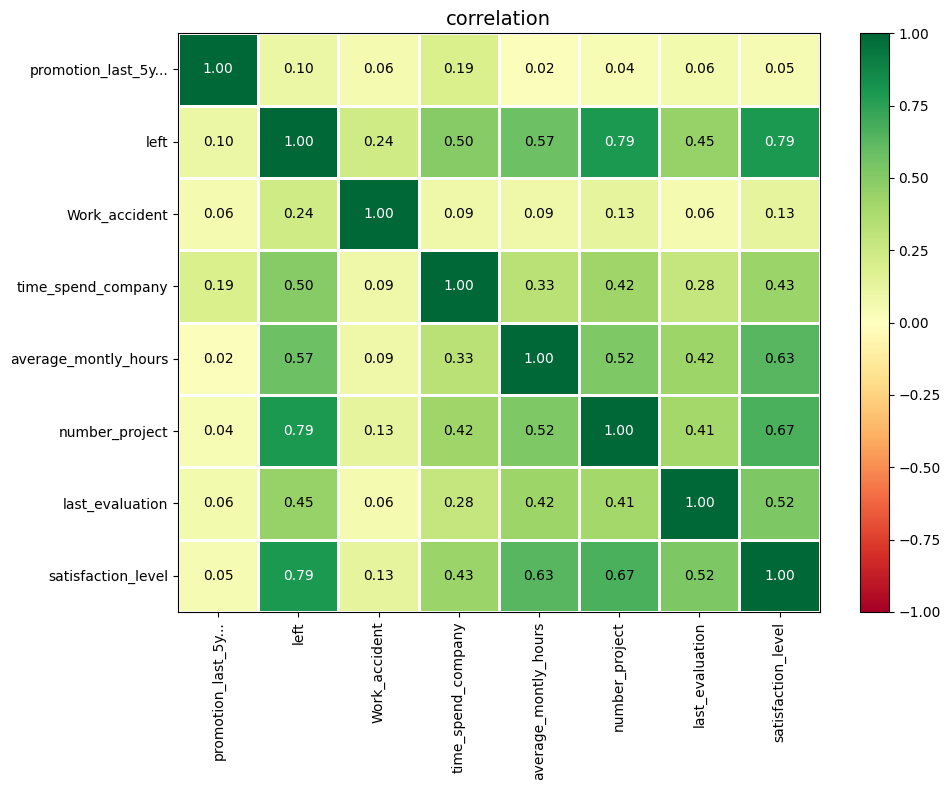

In [9]:
plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, figsize=(10, 8))

4. Сколько сотрудников работает в каждом отделе

In [10]:
df.groupby('department')['department'].count()

,department
department,
IT,1227
RandD,787
accounting,767
hr,739
management,630
marketing,858
product_mng,902
sales,4140
support,2229


5. Распределение сотрудников по зарплатам

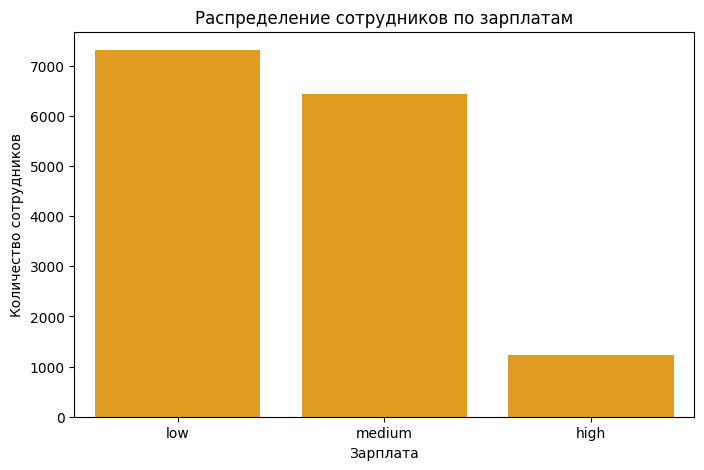

In [11]:
plt.figure(figsize=[8,5])
sns.countplot(data=df, x="salary", color = 'orange')
plt.title("Распределение сотрудников по зарплатам")
plt.xlabel("Зарплата")
plt.ylabel("Количество сотрудников")
plt.show()

6. Распределение сотрудников по зарплатам в каждом отделе по отдельности

In [12]:
df_dep_sal = df.groupby(['salary'])[['department', 'salary']].value_counts().reset_index()
df_dep_sal

,salary,department,count
0,high,sales,269
1,high,management,225
2,high,technical,201
3,high,support,141
4,high,IT,83
5,high,marketing,80
6,high,accounting,74
7,high,product_mng,68
8,high,RandD,51
9,high,hr,45


Text(0.5, 1.0, 'Распределение сотрудников по зарплатам и отделам')

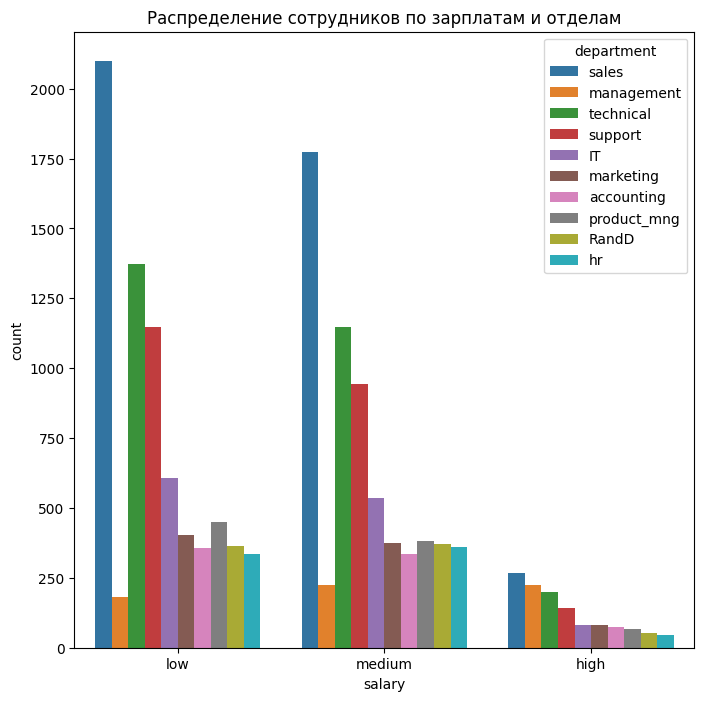

In [13]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=100)

sns.barplot(
              x='salary',
              y='count',
              hue='department',
              data=df_dep_sal,
              ax=ax,
              order=['low', 'medium', 'high']
              )
plt.title("Распределение сотрудников по зарплатам и отделам")

7. Проверка гипотезы, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [14]:
data_high = df[df['salary'] == 'high']['average_montly_hours']
print(f'mean={data_high.mean()} \nmedian={data_high.median()} \nmode={data_high.mode()[0]}')

mean=199.86742118027485 
median=199.0 
mode=180


In [15]:
data_low = df[df['salary'] == 'low']['average_montly_hours']
print(f'mean={data_low.mean()} \nmedian={data_low.median()} \nmode={data_low.mode()[0]}')

mean=200.9965828321487 
median=199.0 
mode=135


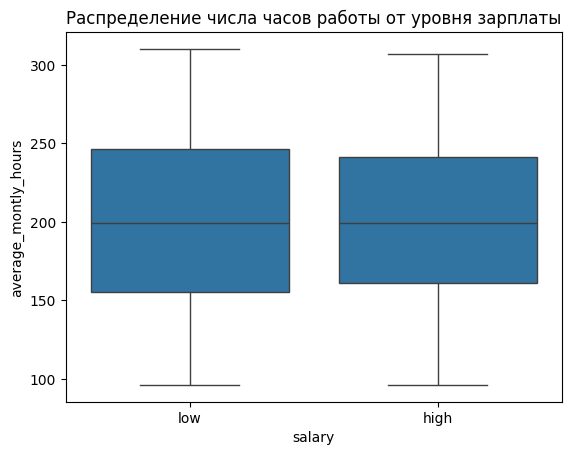

In [16]:
sns.boxplot(data=df[(df['salary'] == 'high') | (df['salary'] == 'low')], x = 'salary', y='average_montly_hours')
plt.title("Распределение числа часов работы от уровня зарплаты")
plt.show()

In [17]:
import scipy.stats as stats
stat, p = stats.shapiro(data_high)

print(f'stat = {stat:.3f}, p = {p:.5f}')
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно не нормальное распределение')

stat = 0.971, p = 0.00000
Вероятно не нормальное распределение


In [18]:
stat, p = stats.shapiro(data_low)

print(f'stat = {stat:.3f}, p = {p:.5f}')
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно не нормальное распределение')

stat = 0.960, p = 0.00000
Вероятно не нормальное распределение


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7316.
  res = hypotest_fun_out(*samples, **kwds)


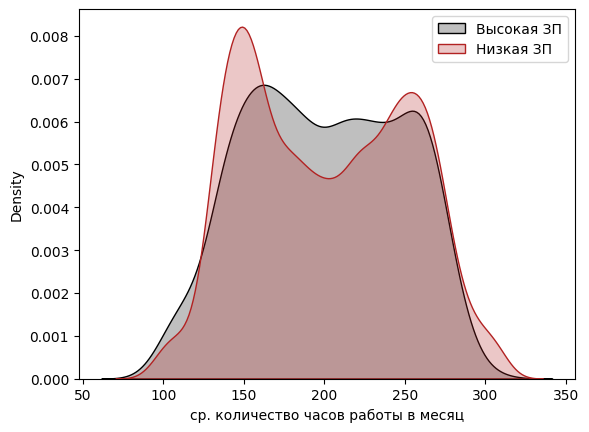

In [19]:
sns.kdeplot(data_high, label="Высокая ЗП", fill = True, color = '#000000')
sns.kdeplot(data_low, label="Низкая ЗП", fill = True, color = '#B22222')
plt.legend()
plt.xlabel("ср. количество часов работы в месяц")
plt.show()

In [20]:
stat, p = stats.mannwhitneyu(data_high, data_low)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика = 4507096.50000, p = 0.82413
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


Гипотеза H1 о том, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом, с уровнем значимости 0,05 не подтвердилась.

Задание 8. Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):

*   Доля сотрудников с повышением за последние 5 лет
*   Средняя степень удовлетворенности
*   Среднее количество проектов

Доля сотрудников с повышением за последние 5 лет

In [21]:
df_left = df[df['left'] == 1]['left'].count() *100/ df['left'].count()
print(f'Доля уволившихся - {round(df_left)}%')

Доля уволившихся - 24%


In [22]:
df_not_left = df[df['left'] == 0]['left'].count() *100/ df['left'].count()
print(f'Доля не уволившихся - {round(df_not_left)}%')

Доля не уволившихся - 76%


Средняя степень удовлетворенности

In [23]:
df_left_sat = df[df['left'] == 1]['satisfaction_level'].mean()
print(f'Ср. степень удовлетворенности среди уволившихся - {round(df_left_sat,2)}')

Ср. степень удовлетворенности среди уволившихся - 0.44


In [24]:
df_not_left_sat = df[df['left'] == 0]['satisfaction_level'].mean()
print(f'Ср. степень удовлетворенности среди не уволившихся - {round(df_not_left_sat,2)}')

Ср. степень удовлетворенности среди не уволившихся - 0.67


Среднее количество проектов

In [25]:
df_left_projects = df[df['left'] == 1]['number_project'].count()
print(f'Количество проектов среди уволившихся - {round(df_left_projects)}')

Количество проектов среди уволившихся - 3571


In [26]:
df_not_left_projects = df[df['left'] == 0]['number_project'].count()
print(f'Количество проектов среди не уволившихся - {round(df_not_left_projects)}')

Количество проектов среди не уволившихся - 11428


9. Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary).

Оценить качество модели на тестовой выборки

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df[['satisfaction_level',	'last_evaluation',	'number_project',	'average_montly_hours',	'time_spend_company',	'Work_accident',	'promotion_last_5years']], df['left'], test_size=0.25, random_state=42)
len(y_test)

3750

In [31]:
lda = LinearDiscriminantAnalysis()

In [32]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [33]:
lda.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0])

In [52]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': lda.predict(X_test)})
result

,Actual,Predicted
6723,0,0
6473,0,0
4679,0,0
862,1,0
7286,0,0
...,...,...
10371,0,0
12541,1,0
2656,0,0
6759,0,1


In [53]:
from sklearn.metrics import accuracy_score

In [54]:
accuracy_score(y_test, lda.predict(X_test))

0.7536

Согласно модели с вероятностью 75% можно утверждать, что сотрудники увольнялись основываясь на факторах: satisfaction_level,	last_evaluation,	number_project,	average_montly_hours,	time_spend_company,	Work_accident,	promotion_last_5years.

Косвенно на это указывала корреляционная зависимость по некоторым из выше перечисленных факторов.

In [55]:
lda.coef_

array([[-4.58366087e+00,  6.57019075e-01, -2.18430857e-01,
         4.47682750e-03,  2.22165799e-01, -1.04525663e+00,
        -1.10730495e+00]])

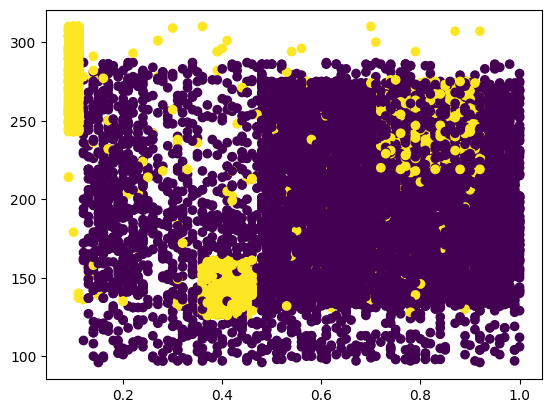

In [56]:
plt.scatter(x=X_train['satisfaction_level'], y=X_train['average_montly_hours'], c=y_train)
plt.show()

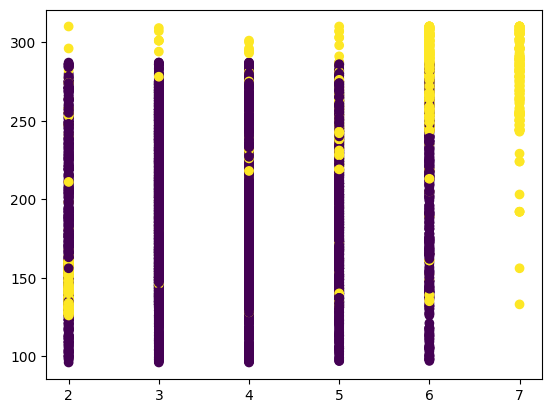

In [57]:
plt.scatter(x=X_train['number_project'], y=X_train['average_montly_hours'], c=y_train)
plt.show()

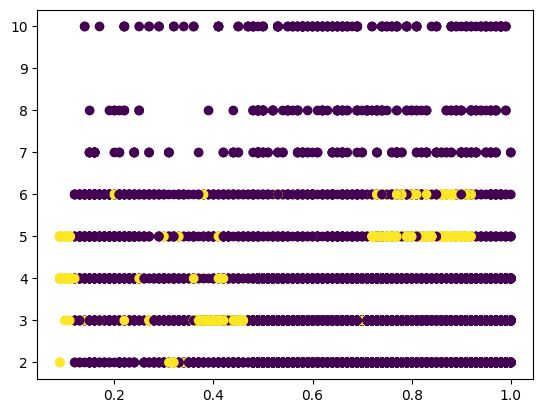

In [58]:
plt.scatter(x=X_train['satisfaction_level'], y=X_train['time_spend_company'], c=y_train)
plt.show()